In [1]:
#-Intregrasi colab dan drive-

from google.colab import drive
drive.mount('/content/drive')

#-Install lib yang dibutuhkan-
!pip install matplotlib --upgrade
!pip install swifter
!pip install Sastrawi
!pip install googletrans==3.1.0a0
from googletrans import Translator

import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt

#-Modify-
import regex as re

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import swifter
import ast

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#-Model-
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report

#-Asess-
import seaborn as sns
import pickle

#-Wordcloud-
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import PIL
from PIL import Image

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=94c5f1fa78e709f5ccc4591419638df5302bf6988a4384d03b5a4199538d666f
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **MODIFY**

In [2]:
#define dataframe
data_anies = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/AniesRMExcel.xlsx')
data_anies

,publishedAt,authorDisplayName,textDisplay,likeCount,sentimen,platform,capresName
0,2023-09-21T17:07:23Z,Vahide Azadi,Iya kampanye di adzan yah,0,Negatif,Youtube,AniesBaswedan
1,2023-09-24T03:53:12Z,Supardi Pardi,Sosoknya pas pemimpin pa.anis indonesia yg ber...,0,Positif,Youtube,AniesBaswedan
2,2023-09-26T15:22:18Z,MD P,Salut bisa presentasi tanpa material presentas...,0,Negatif,Youtube,AniesBaswedan
3,2023-09-21T15:49:06Z,Abdul Rahman,Buzzer masuk perangkap..panik panik panik lah????,0,Negatif,Youtube,AniesBaswedan
4,2023-10-26T19:03:13Z,Faisal Siregar,Topik anes waswedan. ??,0,Netral,Youtube,AniesBaswedan
...,...,...,...,...,...,...,...
895,2023-09-29T16:13:04Z,Sello Kartoe,Huuek huuek huuek huuuek,0,Netral,Youtube,AniesBaswedan
896,2023-09-21T18:49:36Z,Amira Au,"Merinding dengar gagasan pak Anies, Smoga Alla...",204,Positif,Youtube,AniesBaswedan
897,2023-09-23T01:57:08Z,Legs,Anis mantap,0,Positif,Youtube,AniesBaswedan
898,2023-09-24T02:02:51Z,efaldy keyn,Untung aja ada mbak najwa .kita jd bisa mengen...,1,Positif,Youtube,AniesBaswedan


**atribut elimination**

In [3]:
data_anies = data_anies[
    ['textDisplay','sentimen']
]
data_anies

,textDisplay,sentimen
0,Iya kampanye di adzan yah,Negatif
1,Sosoknya pas pemimpin pa.anis indonesia yg ber...,Positif
2,Salut bisa presentasi tanpa material presentas...,Negatif
3,Buzzer masuk perangkap..panik panik panik lah????,Negatif
4,Topik anes waswedan. ??,Netral
...,...,...
895,Huuek huuek huuek huuuek,Netral
896,"Merinding dengar gagasan pak Anies, Smoga Alla...",Positif
897,Anis mantap,Positif
898,Untung aja ada mbak najwa .kita jd bisa mengen...,Positif


**text preprocessing**

In [4]:
#CASE_FOLDING

# Definisikan fungsi case folding
def caseFolding(content):
    return content.lower()

In [5]:
#CLEANING

#regex pattern
clean_sym = re.compile(r'[^a-zA-Z\s]')
clean_num = re.compile(r'\d+')
clean_dblspc = re.compile(r'\s+')
clean_link = re.compile(r'<a\s+href="[^"]*"></a>')
clean_html = re.compile(r'<.*?>')

#definisikan fungsi cleaning
def cleaning(content):
    content = clean_sym.sub(' ', content)
    content = clean_num.sub(' ', content)
    content = clean_dblspc.sub(' ', content)
    content = clean_link.sub(' ', content)
    content = clean_html.sub(' ', content)
    return content

In [6]:
#TOKENIZING

#definisikan fungsi tokenize
def tokenize(content):
    return word_tokenize(content)

In [7]:
#NORMALIZE

#read kamus norm
norm_words = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/norm.xlsx')

In [8]:
#DICTIONARY

norm_word_dict = {}

#mengganti kata sesuai kamus norm
for index, row in norm_words.iterrows():
    if row[0] not in norm_word_dict:
        norm_word_dict[row[0]] = row[1]

#definisikan fungsi normalize
def normalize(content):
    return [
        norm_word_dict[word] if word in norm_word_dict else word for word in content
    ]

In [9]:
#STOPWORDS

nltk_stopwords = stopwords.words('indonesian')
txt_stopwords = open(
    '/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/stopwordAnies.txt', 'r'
).read().split()

In [10]:
all_stopword = nltk_stopwords + txt_stopwords #stopword NLTK dan stopword sesuai paslon
all_stopword = set(all_stopword)

def stopword_removal(content):
    return [word for word in content if word not in all_stopword]

In [11]:
data_anies.insert(2, 'loweredNew', data_anies.iloc[:,0].apply(caseFolding))
data_anies.insert(3, 'cleanedNew', data_anies.iloc[:,2].apply(cleaning))
data_anies.insert(4, 'tokenizedNew', data_anies.iloc[:,3].apply(tokenize))
data_anies.insert(5, 'normalized', data_anies.iloc[:,4].apply(normalize))
data_anies.insert(6, 'stopword_removed', data_anies.iloc[:,5].apply(stopword_removal))
data_anies

,textDisplay,sentimen,loweredNew,cleanedNew,tokenizedNew,normalized,stopword_removed
0,Iya kampanye di adzan yah,Negatif,iya kampanye di adzan yah,iya kampanye di adzan yah,"[iya, kampanye, di, adzan, yah]","[iya, kampanye, di, adzan, yah]","[iya, kampanye]"
1,Sosoknya pas pemimpin pa.anis indonesia yg ber...,Positif,sosoknya pas pemimpin pa.anis indonesia yg ber...,sosoknya pas pemimpin pa anis indonesia yg ber...,"[sosoknya, pas, pemimpin, pa, anis, indonesia,...","[sosoknya, pas, pemimpin, pa, anies, indonesia...","[sosoknya, pas, pemimpin, anies, indonesia, be..."
2,Salut bisa presentasi tanpa material presentas...,Negatif,salut bisa presentasi tanpa material presentas...,salut bisa presentasi tanpa material presentas...,"[salut, bisa, presentasi, tanpa, material, pre...","[salut, bisa, presentasi, tanpa, material, pre...","[salut, presentasi, material, presentasi, moda..."
3,Buzzer masuk perangkap..panik panik panik lah????,Negatif,buzzer masuk perangkap..panik panik panik lah????,buzzer masuk perangkap panik panik panik lah,"[buzzer, masuk, perangkap, panik, panik, panik...","[pendengung, masuk, perangkap, panik, panik, p...","[pendengung, masuk, perangkap, panik, panik, p..."
4,Topik anes waswedan. ??,Netral,topik anes waswedan. ??,topik anes waswedan,"[topik, anes, waswedan]","[topik, anies, anies]","[topik, anies, anies]"
...,...,...,...,...,...,...,...
895,Huuek huuek huuek huuuek,Netral,huuek huuek huuek huuuek,huuek huuek huuek huuuek,"[huuek, huuek, huuek, huuuek]","[huuek, huuek, huuek, huuuek]",[]
896,"Merinding dengar gagasan pak Anies, Smoga Alla...",Positif,"merinding dengar gagasan pak anies, smoga alla...",merinding dengar gagasan pak anies smoga allah...,"[merinding, dengar, gagasan, pak, anies, smoga...","[merinding, dengar, gagasan, bapak, anies, sem...","[merinding, dengar, gagasan, anies, semoga, me..."
897,Anis mantap,Positif,anis mantap,anis mantap,"[anis, mantap]","[anies, mantap]","[anies, mantap]"
898,Untung aja ada mbak najwa .kita jd bisa mengen...,Positif,untung aja ada mbak najwa .kita jd bisa mengen...,untung aja ada mbak najwa kita jd bisa mengena...,"[untung, aja, ada, mbak, najwa, kita, jd, bisa...","[untung, saja, ada, mbak, najwa, kita, jadi, b...","[untung, mengenal, capres, capres, acara, teri..."


In [12]:
#STEMMING

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
#definisikan fungsi stemming
def stemming(word):
    return stemmer.stem(word)

word_dict = {}

for content in data_anies['stopword_removed']:
    for word in content:
        word_dict[word] = ' '

print(len(word_dict))
print('============================')
for word in word_dict:
    word_dict[word] = stemming(word)
    print(word,':' ,word_dict[word])

2223
iya : iya
kampanye : kampanye
sosoknya : sosok
pas : pas
pemimpin : pimpin
anies : anies
indonesia : indonesia
berkeadilan : adil
rakyat : rakyat
cerdas : cerdas
banget : banget
salut : salut
presentasi : presentasi
material : material
modal : modal
bacot : bacot
jagonya : jago
deh : deh
pendengung : dengung
masuk : masuk
perangkap : perangkap
panik : panik
topik : topik
terbaik : baik
kemana : mana
arah : arah
tujuan : tuju
bangsa : bangsa
merdeka : merdeka
pilih : pilih
munafik : munafik
gagasan : gagas
orang : orang
sekolah : sekolah
bohong : bohong
kejar : kejar
separuh : paruh
lihat : lihat
nya : nya
menutupi : tutup
memuaskan : muas
bangga : bangga
presiden : presiden
terbukti : bukti
uang muka : uang muka
nol : nol
omong : omong
kosong : kosong
republik,indonesia : republik indonesia
harga : harga
dikenal : kenal
dunia : dunia
calon : calon
jangkauan : jangkau
global : global
gerak : gerak
gerik : gerik
beliau : beliau
santai : santai
berisi : isi
mengerti : erti
komentar :

In [14]:
def stemming_content(content):
    return [word_dict[word] for word in content]
data_anies.insert(
    7,
    'stemmed',
    data_anies.iloc[:,6].swifter.apply(stemming_content)
)

Pandas Apply:   0%|          | 0/900 [00:00<?, ?it/s]

In [15]:
# EXPORT CLEANED
data_anies.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/niesBeforeCleaning.xlsx', index=False)

In [16]:
# FINAL RESULT AND DROP ANOTHER ATTRIBUTES
data_anies.iloc[:,0] = data_anies.iloc[:,7]
data_anies = data_anies[['textDisplay','sentimen',]]
data_anies

,textDisplay,sentimen
0,"[iya, kampanye]",Negatif
1,"[sosok, pas, pimpin, anies, indonesia, adil, r...",Positif
2,"[salut, presentasi, material, presentasi, moda...",Negatif
3,"[dengung, masuk, perangkap, panik, panik, panik]",Negatif
4,"[topik, anies, anies]",Netral
...,...,...
895,[],Netral
896,"[merinding, dengar, gagas, anies, moga, mudah,...",Positif
897,"[anies, mantap]",Positif
898,"[untung, kenal, capres, capres, acara, terima ...",Positif


In [17]:
# EXPORT CLEANED
data_anies.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/AniesBeforeMV.xlsx', index=False)

In [18]:
# MISSING VALUE

data_cleanAnies = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/AniesBeforeMV.xlsx')

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

data_cleanAnies.insert(1,'textDisplay_join', data_cleanAnies['textDisplay'].apply(join_text_list))

In [19]:
data_cleanAnies = data_cleanAnies[data_cleanAnies['textDisplay_join'] != '' ].reset_index(drop=True)
display(data_cleanAnies)

data_cleanAnies.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/AniesTestPrep.xlsx', index=False)

,textDisplay,textDisplay_join,sentimen
0,"['iya', 'kampanye']",iya kampanye,Negatif
1,"['sosok', 'pas', 'pimpin', 'anies', 'indonesia...",sosok pas pimpin anies indonesia adil rakyat i...,Positif
2,"['salut', 'presentasi', 'material', 'presentas...",salut presentasi material presentasi modal bac...,Negatif
3,"['dengung', 'masuk', 'perangkap', 'panik', 'pa...",dengung masuk perangkap panik panik panik,Negatif
4,"['topik', 'anies', 'anies']",topik anies anies,Netral
...,...,...,...
819,"['lihat', 'teks', 'geser', 'anies']",lihat teks geser anies,Positif
820,"['merinding', 'dengar', 'gagas', 'anies', 'mog...",merinding dengar gagas anies moga mudah langkah,Positif
821,"['anies', 'mantap']",anies mantap,Positif
822,"['untung', 'kenal', 'capres', 'capres', 'acara...",untung kenal capres capres acara terima kasih ...,Positif


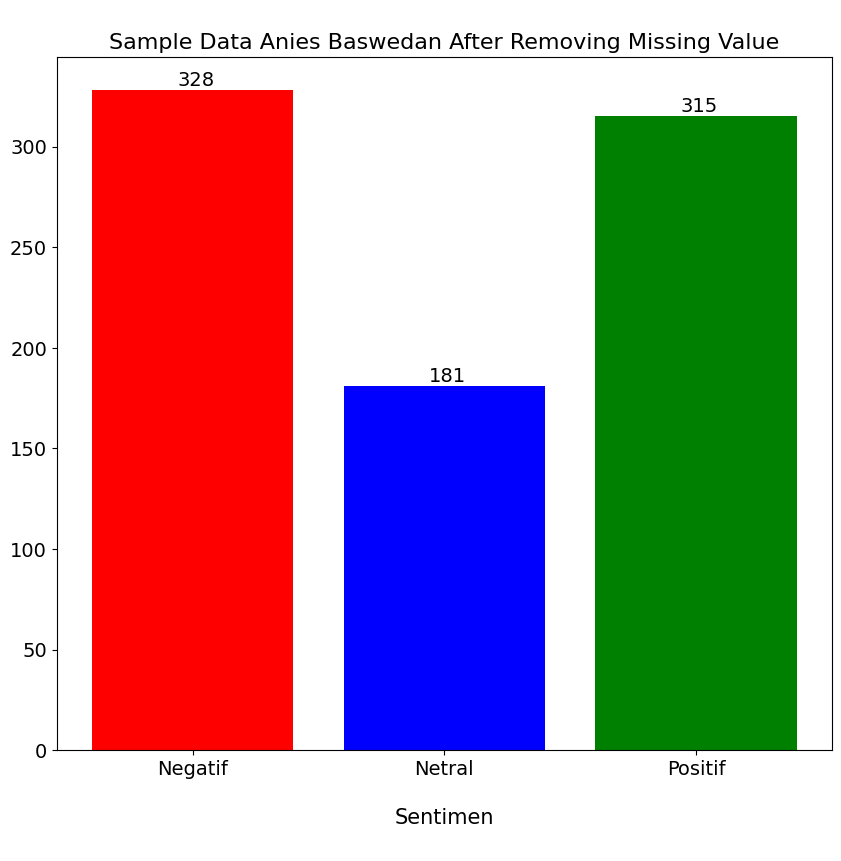

In [20]:
# SAMPEL DATA AFTER MISSING VALUE
x = ['Negatif','Netral','Positif']
y = data_cleanAnies['sentimen'].value_counts().sort_index()

fig, ax =  plt.subplots(figsize = (10, 9))  #---membuat figure dan axes--
ax.bar(x, y, color=('red','blue','green')) #---membuat bar chart---
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())), (bar.get_x(), bar.get_height())
                 ,ha='center',
                  va='center',
                  size=14,
                  xytext=(75, 7),
                  textcoords='offset points')
plt.title('\nSample Data Anies Baswedan After Removing Missing Value', size=16)
plt.ylim(bottom=0)
plt.xlabel('\nSentimen\n', size=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

## **MODEL**

In [21]:
#IMPORT DATA TEST PREP

import string

data_modelAnies = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/AniesTestpRep.xlsx')
data_modelAnies

,textDisplay,textDisplay_join,sentimen
0,"['iya', 'kampanye']",iya kampanye,Negatif
1,"['sosok', 'pas', 'pimpin', 'anies', 'indonesia...",sosok pas pimpin anies indonesia adil rakyat i...,Positif
2,"['salut', 'presentasi', 'material', 'presentas...",salut presentasi material presentasi modal bac...,Negatif
3,"['dengung', 'masuk', 'perangkap', 'panik', 'pa...",dengung masuk perangkap panik panik panik,Negatif
4,"['topik', 'anies', 'anies']",topik anies anies,Netral
...,...,...,...
819,"['lihat', 'teks', 'geser', 'anies']",lihat teks geser anies,Positif
820,"['merinding', 'dengar', 'gagas', 'anies', 'mog...",merinding dengar gagas anies moga mudah langkah,Positif
821,"['anies', 'mantap']",anies mantap,Positif
822,"['untung', 'kenal', 'capres', 'capres', 'acara...",untung kenal capres capres acara terima kasih ...,Positif


In [22]:
# CHANGE DATA TYPES
data_modelAnies = data_modelAnies.astype({'textDisplay_join': 'string'})
data_modelAnies = data_modelAnies.astype({'sentimen': 'category'})
data_modelAnies.dtypes

textDisplay                 object
textDisplay_join    string[python]
sentimen                  category
dtype: object

In [23]:
# DIVIDE VARIABLE

x = data_modelAnies['textDisplay_join']
y = data_modelAnies['sentimen']

print(x.shape)
print(y.shape)

(824,)
(824,)


In [24]:
# HOW TO KNOW SHAPE TRAIN AND TESTING

x_train, x_test, y_train, y_test = train_test_split(data_modelAnies['textDisplay_join'], data_modelAnies['sentimen'],
                                                    test_size = 0.5,
                                                    random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(412,)
(412,)
(412,)
(412,)


In [25]:
#TF IDF PROCESS

tf = TfidfVectorizer(ngram_range=(1, 1)) #--mempertimbangkan hanya unigram--
text_tf = tf.fit_transform(data_modelAnies['textDisplay_join'].values.astype('U'))
print(text_tf)

h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(text_tf)
print(x_tfidf)

tfidf_vect =TfidfVectorizer()
vectors = tfidf_vect.fit_transform(data_modelAnies['textDisplay_join'].values.astype('U'))
feature_names = tfidf_vect.get_feature_names_out()

tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(vectors)

X = data_modelAnies['sentimen']
Y = data_modelAnies['textDisplay_join']

  (0, 608)	0.8593080567107086
  (0, 533)	0.5114583694418009
  (1, 120)	0.34918100484254677
  (1, 253)	0.28940301331106344
  (1, 1158)	0.2700700040508467
  (1, 5)	0.31335142339136995
  (1, 498)	0.41913232902136327
  (1, 67)	0.13128692504141765
  (1, 1087)	0.2458182819975613
  (1, 1035)	0.44688849714681245
  (1, 1359)	0.4124893665903783
  (2, 293)	0.31866196085233034
  (2, 540)	0.2606789463311417
  (2, 98)	0.26575308113501545
  (2, 904)	0.29406073277292905
  (2, 862)	0.3381890541278578
  (2, 1116)	0.6763781082557156
  (2, 1229)	0.31866196085233034
  (3, 1027)	0.9029692054887082
  (3, 1062)	0.3009897351629027
  (3, 858)	0.209261412602046
  (3, 301)	0.22419066541997937
  (4, 1498)	0.8905134516275092
  (4, 67)	0.45495691276258227
  (5, 1086)	0.2590868088825538
  :	:
  (819, 1434)	0.549680323201125
  (819, 791)	0.4202548544230584
  (819, 67)	0.1786862843168842
  (820, 881)	0.5382755422023322
  (820, 759)	0.514872552852212
  (820, 916)	0.35953091990112673
  (820, 299)	0.3881172024359907
  (82

In [26]:
#TF IDF DATA FRAME

X = tfidf_vect.fit_transform(data_modelAnies['textDisplay_join'])

df_tfidf = pd.DataFrame(X.T.todense(), index=feature_names,
                        columns=[f'D{i+1}' for i in range(X.shape[0])])
df_tfidf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D815,D816,D817,D818,D819,D820,D821,D822,D823,D824
abdi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
acara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.293825,0.0,0.0,0.0,0.0,0.0,0.0,0.343459,0.0
acung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
adem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wujud,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
yakin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
yang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
zalim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [27]:
#TOP TEN MEAN TF_IDF

mean_tfidf = df_tfidf.mean(axis=1)
df_tfidf_mean = pd.DataFrame({'feature': feature_names, 'mean_tfidf': mean_tfidf})
df_tfidf_mean = df_tfidf_mean.sort_values(by='mean_tfidf', ascending=False)

top_10_features = df_tfidf_mean.head(10)
print(top_10_features)

             feature  mean_tfidf
anies          anies    0.110354
presiden    presiden    0.041717
indonesia  indonesia    0.037841
gagas          gagas    0.033583
omong          omong    0.029318
iya              iya    0.026746
pimpin        pimpin    0.025327
moga            moga    0.021769
mantap        mantap    0.021769
pilih          pilih    0.020347


In [28]:
#COUNT VECTOR
cv=CountVectorizer()

cv.fit(data_modelAnies['textDisplay_join'])
print(cv.vocabulary_)

vocabulary_df = pd.DataFrame(list(cv.vocabulary_.items()), columns=['Term', 'Index'])
vocabulary_df.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/AniesCountVectorizer.xlsx', index=False)

{'iya': 533, 'kampanye': 608, 'sosok': 1359, 'pas': 1035, 'pimpin': 1087, 'anies': 67, 'indonesia': 498, 'adil': 5, 'rakyat': 1158, 'cerdas': 253, 'banget': 120, 'salut': 1229, 'presentasi': 1116, 'material': 862, 'modal': 904, 'bacot': 98, 'jago': 540, 'deh': 293, 'dengung': 301, 'masuk': 858, 'perangkap': 1062, 'panik': 1027, 'topik': 1498, 'baik': 108, 'mana': 836, 'arah': 77, 'tuju': 1512, 'bangsa': 123, 'merdeka': 880, 'pilih': 1086, 'munafik': 923, 'gagas': 379, 'orang': 997, 'sekolah': 1269, 'bohong': 206, 'kejar': 640, 'paruh': 1034, 'lihat': 791, 'nya': 975, 'tutup': 1529, 'muas': 914, 'bangga': 121, 'presiden': 1117, 'bukti': 221, 'uang': 1531, 'muka': 917, 'nol': 966, 'omong': 994, 'kosong': 717, 'republik': 1191, 'harga': 446, 'kenal': 660, 'dunia': 340, 'calon': 237, 'jangkau': 553, 'global': 405, 'gerak': 394, 'gerik': 395, 'beliau': 158, 'santai': 1241, 'isi': 526, 'erti': 362, 'komentar': 692, 'suka': 1374, 'bagus': 102, 'nomor': 967, 'tangan': 1410, 'corona': 271, 'tol

In [29]:
#COUNT MATRIX
count_vector=cv.fit_transform(data_modelAnies['textDisplay_join'])
count_vectors=count_vector.toarray()
feature_names_cv = cv.get_feature_names_out()

#COUNTVECTOR SCORES
first_document_vector=count_vector[0]

#PRINT
countv = pd.DataFrame(first_document_vector.T.todense(),
index=feature_names_cv, columns=["Countvectorizer"])
countv.sort_values(by=["Countvectorizer"],ascending=False)

,Countvectorizer
iya,1
kampanye,1
abdi,0
peka,0
penjara,0
...,...
invalid,0
intoleransi,0
intoleran,0
intimidasi,0


In [30]:
#menampilkan hasil tf-idf per kalimat
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features)
    counts = cvect.fit_transform(data_modelAnies["textDisplay_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
    tfs = tfidf.fit_transform(data_modelAnies["textDisplay_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()


tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

#data sampel
idx_sample = 7

print("Menampilkan TFIDF sample ke-" + str(idx_sample), "\n")
print(data_modelAnies["textDisplay_join"][idx_sample], "\n")

print("\t", "\tTerm", "\t", "TF", "\t", "IDF", "\t", "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ('%20s' % item[3], "\t",
               "%.3f" % item[0], "\t",
               "%.3f" % item[1], "\t",
               "%.3f" % item[2])

Menampilkan TFIDF sample ke-7 

gagas orang sekolah 

	 	Term 	 TF 	 IDF 	 TF-IDF

               gagas 	 0.333 	 3.129 	 1.043
               orang 	 0.333 	 3.509 	 1.170
             sekolah 	 0.333 	 5.517 	 1.839


**NON SMOTE**

In [31]:
#skenario 01

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [32]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [34]:
y_pred = model.predict(X_test)
print("Test Skenario 90:10")
print(classification_report(y_test, y_pred))

Test Skenario 90:10
              precision    recall  f1-score   support

     Negatif       0.67      0.84      0.74        38
      Netral       0.71      0.25      0.37        20
     Positif       0.75      0.84      0.79        25

    accuracy                           0.70        83
   macro avg       0.71      0.64      0.64        83
weighted avg       0.70      0.70      0.67        83



In [35]:
#skenario 02

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [36]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [38]:
y_pred = model.predict(X_test)
print("Test Skenario 80:20")
print(classification_report(y_test, y_pred))

Test Skenario 80:20
              precision    recall  f1-score   support

     Negatif       0.57      0.80      0.67        69
      Netral       0.62      0.20      0.30        40
     Positif       0.68      0.68      0.68        56

    accuracy                           0.61       165
   macro avg       0.62      0.56      0.55       165
weighted avg       0.62      0.61      0.58       165



In [39]:
#skenario 03

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [40]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [42]:
y_pred = model.predict(X_test)
print("Test Skenario 70:30")
print(classification_report(y_test, y_pred))

Test Skenario 70:30
              precision    recall  f1-score   support

     Negatif       0.60      0.74      0.66       108
      Netral       0.47      0.14      0.21        58
     Positif       0.63      0.76      0.69        82

    accuracy                           0.60       248
   macro avg       0.57      0.54      0.52       248
weighted avg       0.58      0.60      0.57       248



In [43]:
#skenario 04

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [44]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [45]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [46]:
y_pred = model.predict(X_test)
print("Test Skenario 60:40")
print(classification_report(y_test, y_pred))

Test Skenario 60:40
              precision    recall  f1-score   support

     Negatif       0.58      0.86      0.69       137
      Netral       0.70      0.09      0.16        77
     Positif       0.73      0.72      0.73       116

    accuracy                           0.63       330
   macro avg       0.67      0.56      0.53       330
weighted avg       0.66      0.63      0.58       330



In [47]:
#skenario 05

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [48]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [50]:
y_pred = model.predict(X_test)
print("Test Skenario 50:50")
print(classification_report(y_test, y_pred))

Test Skenario 50:50
              precision    recall  f1-score   support

     Negatif       0.58      0.79      0.67       171
      Netral       0.54      0.15      0.24        97
     Positif       0.66      0.69      0.68       144

    accuracy                           0.61       412
   macro avg       0.59      0.55      0.53       412
weighted avg       0.60      0.61      0.57       412



**USING SMOTE**

In [51]:
#skenario 01

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [52]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.1, random_state=42)

In [54]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [55]:
y_pred = model.predict(X_test)
print("Test Skenario 90:10")
print(classification_report(y_test, y_pred))

Test Skenario 90:10
              precision    recall  f1-score   support

     Negatif       0.67      0.71      0.69        34
      Netral       0.81      0.73      0.77        30
     Positif       0.72      0.74      0.73        35

    accuracy                           0.73        99
   macro avg       0.73      0.73      0.73        99
weighted avg       0.73      0.73      0.73        99



In [56]:
#Confusion Matrix

def eval (y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    f, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    #sns.set(font_scale=1.0)
    ax.tick_params(axis='both', which='major', labelsize=12)

    categories = [['True Negative', 'False Neutral', 'False Positive'],
                  ['False Negative', 'True Neutral', 'False Positive'],
                  ['False Negative', 'False Neutral', 'True Positive',]]

    positions = [(i, j) for i in range(len(cm)) for j in range(len(cm[i]))]

    for (i, j) in positions:
        if i < len(cm) and j < len(cm[i]):
            value = cm[i, j]
            category = categories[i][j]
            ax.text(j + 0.5, i + 0.7, f'{category}', ha="center", va="center", color='white', fontsize=8, fontweight='bold')

    print('RFC Model Perfomance: Anies Baswedan' + '\nSMOTE 90:10\n')
    plt.show()
    print('__________________________________________________________\n')
    print(classification_report(y_test, y_pred, zero_division = 0, digits = 2))
    print('__________________________________________________________')
    print('\nAccuracy\t: ', accuracy_score(y_test, y_pred))
    print('Precision\t: ', precision_score(y_test, y_pred, average='macro'))
    print('Recall\t\t: ', recall_score(y_test, y_pred, average='macro'))
    print('F1-Score\t: ', f1_score(y_test, y_pred, average='macro'))
    print('\n=========================================================\n')


RFC Model Perfomance: Anies Baswedan
SMOTE 90:10



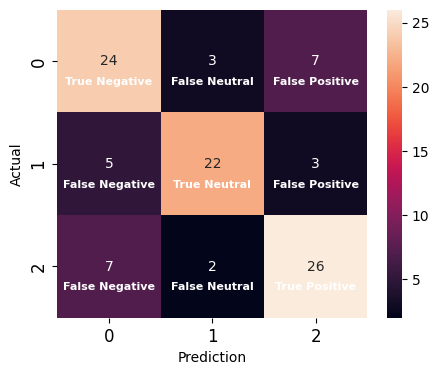

__________________________________________________________

              precision    recall  f1-score   support

     Negatif       0.67      0.71      0.69        34
      Netral       0.81      0.73      0.77        30
     Positif       0.72      0.74      0.73        35

    accuracy                           0.73        99
   macro avg       0.73      0.73      0.73        99
weighted avg       0.73      0.73      0.73        99

__________________________________________________________

Accuracy	:  0.7272727272727273
Precision	:  0.7345679012345679
Recall		:  0.727357609710551
F1-Score	:  0.7300128254909574




In [57]:
eval(y_test, y_pred)

In [58]:
#skenario 02

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [59]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [61]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [62]:
y_pred = model.predict(X_test)
print("Test Skenario 80:20")
print(classification_report(y_test, y_pred))

Test Skenario 80:20
              precision    recall  f1-score   support

     Negatif       0.56      0.80      0.66        65
      Netral       0.91      0.63      0.75        68
     Positif       0.74      0.66      0.69        64

    accuracy                           0.70       197
   macro avg       0.74      0.70      0.70       197
weighted avg       0.74      0.70      0.70       197



In [63]:
#skenario 03

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [64]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [66]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [67]:
y_pred = model.predict(X_test)
print("Test Skenario 70:30")
print(classification_report(y_test, y_pred))

Test Skenario 70:30
              precision    recall  f1-score   support

     Negatif       0.54      0.72      0.62        98
      Netral       0.86      0.57      0.68       104
     Positif       0.69      0.70      0.70        94

    accuracy                           0.66       296
   macro avg       0.70      0.66      0.67       296
weighted avg       0.70      0.66      0.67       296



In [68]:
#skenario 04

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [69]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.4, random_state=42)

In [71]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [72]:
y_pred = model.predict(X_test)
print("Test Skenario 60:40")
print(classification_report(y_test, y_pred))

Test Skenario 60:40
              precision    recall  f1-score   support

     Negatif       0.52      0.82      0.64       120
      Netral       0.87      0.55      0.67       135
     Positif       0.77      0.65      0.71       139

    accuracy                           0.67       394
   macro avg       0.72      0.68      0.67       394
weighted avg       0.73      0.67      0.67       394



In [73]:
#skenario 05

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelAnies['textDisplay_join'])
y = data_modelAnies['sentimen']

In [74]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

In [76]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [77]:
y_pred = model.predict(X_test)
print("Test Skenario 60:40")
print(classification_report(y_test, y_pred))

Test Skenario 60:40
              precision    recall  f1-score   support

     Negatif       0.53      0.84      0.65       160
      Netral       0.87      0.52      0.65       168
     Positif       0.75      0.64      0.69       164

    accuracy                           0.66       492
   macro avg       0.72      0.67      0.67       492
weighted avg       0.72      0.66      0.67       492



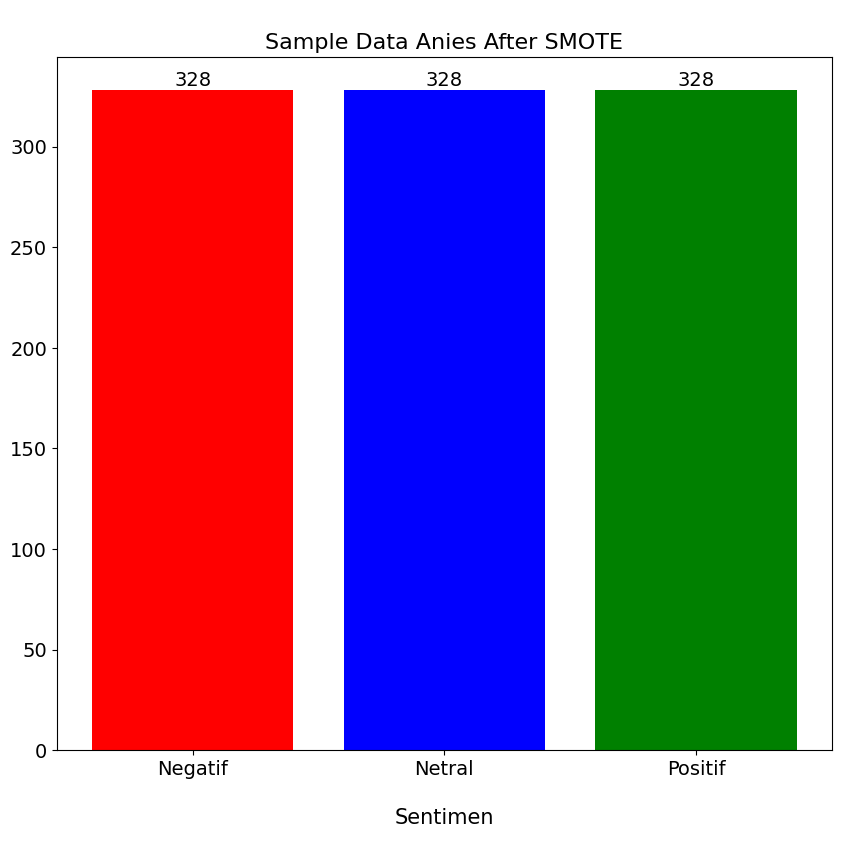

In [78]:
#VISUALIASI AFTER SMOTE
from sklearn.preprocessing import LabelEncoder

#change label to numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_smote)

#setup bar for SMOTE
x = ['Negatif', 'Netral', 'Positif']
y = np.bincount(y_encoded)
fig, ax = plt.subplots(figsize=(10, 9))
ax.bar(x, y, color=('red', 'blue', 'green'))
for bar in ax.patches:
    ax.annotate(str(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=14, xytext=(0, 7), textcoords='offset points')
plt.title('\nSample Data Anies After SMOTE', size=16)
plt.ylim(bottom=0)
plt.xlabel('\nSentimen\n', size=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

## **Wordcloud**

In [79]:
#definisikan fungsi warna wordcloud
def green_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(120, 100%%, %d%%)' % np.random.randint(49, 51)
def blue_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(240, 100%%, %d%%)' % np.random.randint(49, 51)
def red_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(0, 100%%, %d%%)' % np.random.randint(49, 51)

In [80]:
#import gambar cloud
mask = np.array(Image.open('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/cloud.jpg'))

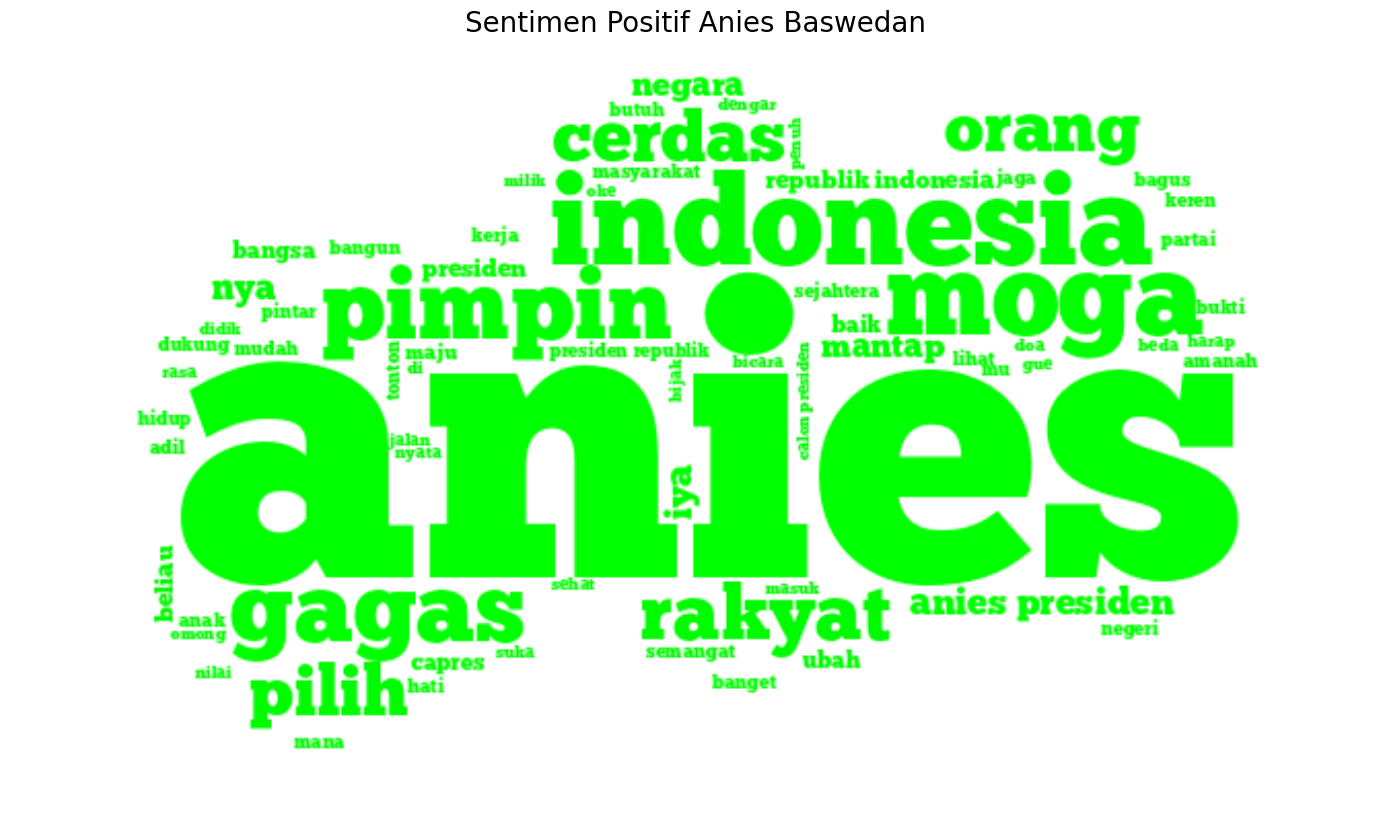

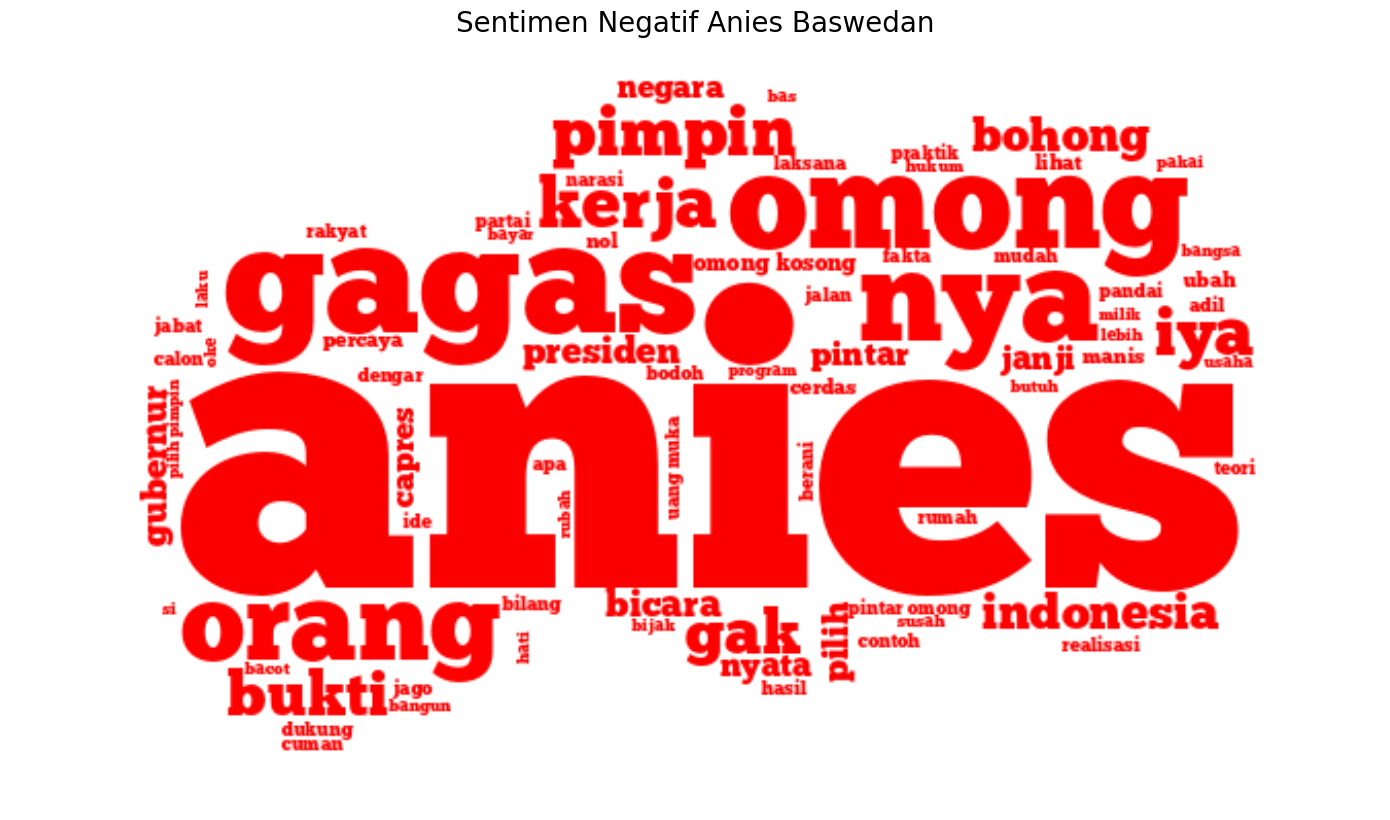

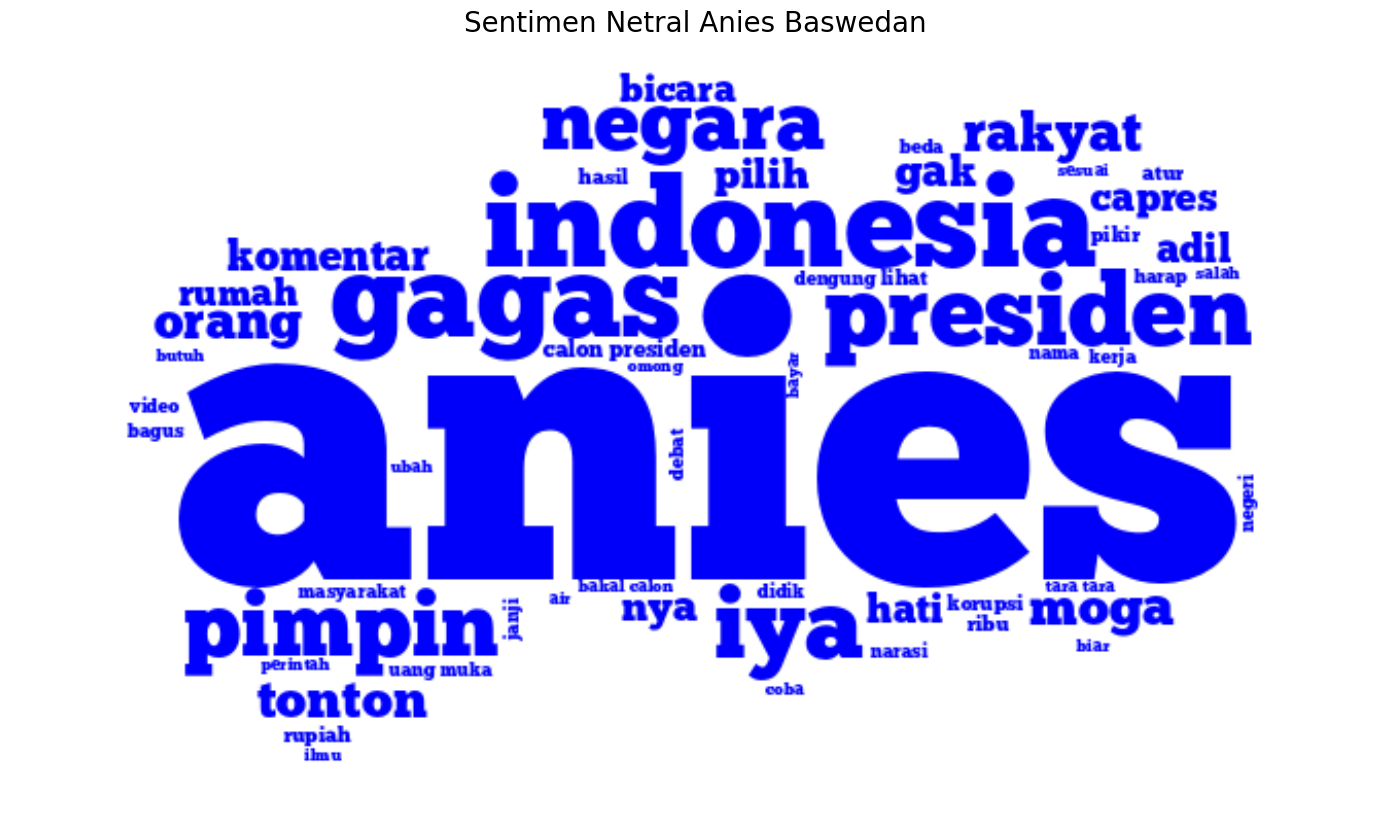

In [81]:
#setup wordcloud

texts_pos = data_modelAnies[data_modelAnies['sentimen'] == 'Positif']['textDisplay_join'].astype(str).str.cat(sep=' ')
texts_neg = data_modelAnies[data_modelAnies['sentimen'] == 'Negatif']['textDisplay_join'].astype(str).str.cat(sep=' ')
texts_neu = data_modelAnies[data_modelAnies['sentimen'] == 'Netral']['textDisplay_join'].astype(str).str.cat(sep=' ')

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_pos = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_pos)

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_neg = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_neg)

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_neu = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/aniesFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_neu)

wordcloud_pos.generate(texts_pos)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_pos.recolor(color_func = green_color), interpolation='bilinear')
plt.title('Sentimen Positif Anies Baswedan', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

wordcloud_neg.generate(texts_neg)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_neg.recolor(color_func = red_color), interpolation='bilinear')
plt.title('Sentimen Negatif Anies Baswedan', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

wordcloud_neu.generate(texts_neu)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_neu.recolor(color_func = blue_color), interpolation='bilinear')
plt.title('Sentimen Netral Anies Baswedan', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()